***In this first machine learning project i have tried to predict the house sales price using linear regression and reduce the mse/rmse as much as possible.I have tried to use extensive data visualisation to get as much insight on the given data as possible.We will also see that how we can select essential features based on their correlation.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from sklearn import datasets
boston_data=datasets.load_boston()
X=boston_data.data
Y=boston_data.target


In [3]:
df=pd.DataFrame(X,columns=boston_data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df["sales price"]=Y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,sales price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data analysis and cleaning

In [5]:
df.isnull().sum() ##check for null entries

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
sales price    0
dtype: int64

In [6]:
print(boston_data.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df.dtypes ## check for non numeric entries

CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
sales price    float64
dtype: object

Skewness= 1.108098
Kurtness=1.495197 


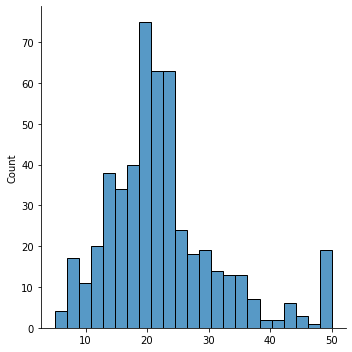

In [8]:
import seaborn as sns
sns.displot(Y);
print("Skewness= %f" % df['sales price'].skew())  ##the plot is a little positive skewed with considerable outliers
print("Kurtness=%f "% df['sales price'].kurt())

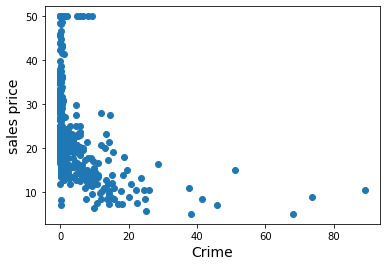

In [9]:
plt.scatter(x=df['CRIM'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('Crime',fontsize=14)
plt.show()   ##as the crime rate is inreased the data plots decreases considerably

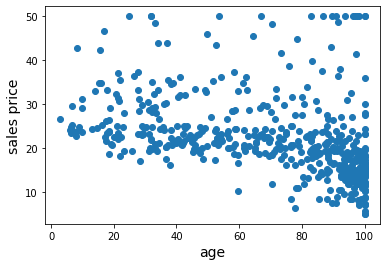

In [10]:
plt.scatter(x=df['AGE'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('age',fontsize=14)
plt.show()  ##there is a significant increase in the sales price with the increase in age

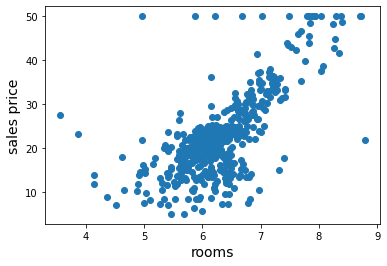

In [11]:
plt.scatter(x=df['RM'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('rooms',fontsize=14)
plt.show()  ##the majority of data plots lies within the range of 5-7 rooms

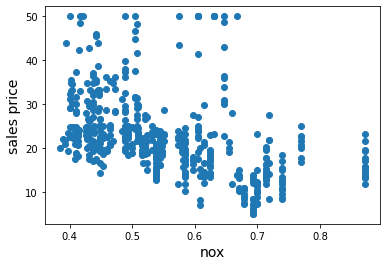

In [12]:
plt.scatter(x=df['NOX'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('nox',fontsize=14)
plt.show()

In [13]:
df['sales price']=Y

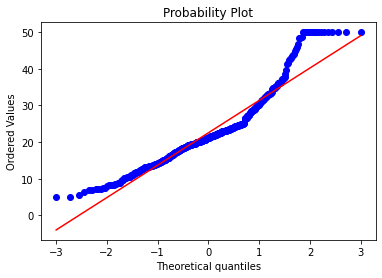

In [14]:
from scipy import stats
from scipy.stats import norm,skew
fig=plt.figure()
res=stats.probplot(df['sales price'],plot=plt)
plt.show()  ##using qq plot we can see that the data is a little skewed and too peaked in the middle

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu= 3.085436621436588
sigma= 0.38658307558179394


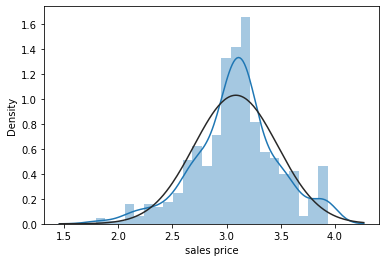

In [15]:
df['sales price']=np.log1p(df['sales price'])

sns.distplot(df['sales price'],fit=norm);
mu,sigma=norm.fit(df['sales price'])
print("mu=",mu);
print("sigma=",sigma);
##taking the log(1+sales price) i have tried to eliminate the skewness and the outliers to some extent

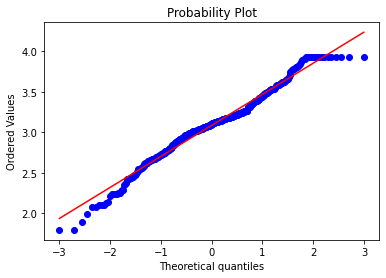

In [16]:
fig=plt.figure()
res=stats.probplot(df['sales price'],plot=plt)
plt.show()  ##qq plot considerably shifting toward normal distribution

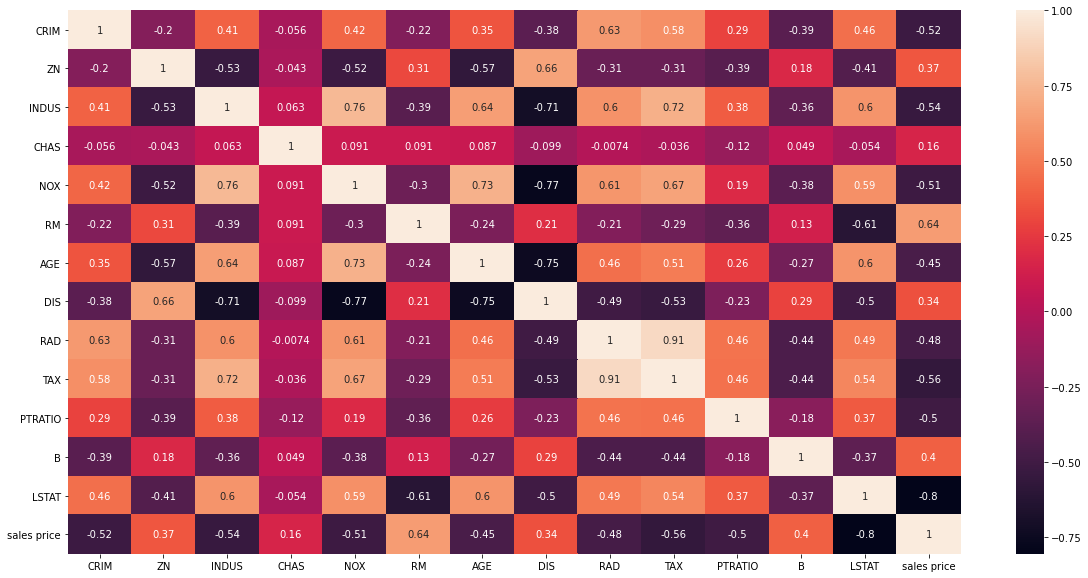

In [17]:
plt.figure(figsize=(20,10))
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()   ## using the heat map we can see that the coefficient ranges from -1 to 1

* by looking at the correlation matrix, LSTAT is the feature which is most negatively correlated(-0.8) with sales price wheras RM is most positively correlated(0.64) 
* if we check for multi-co-linearity we cans observe that RAD and TAX are highly correlated with each other(0.91) so we may not select them together.

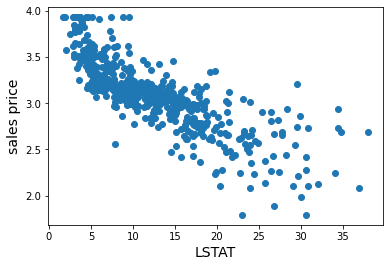

In [18]:
plt.scatter(x=df['LSTAT'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('LSTAT',fontsize=14)
plt.show() ## the price dec with an inc in LSTAT

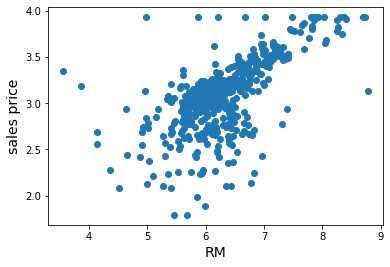

In [19]:
plt.scatter(x=df['RM'],y=df['sales price'])
plt.ylabel('sales price',fontsize=14)
plt.xlabel('RM',fontsize=14)
plt.show() #the price inc with an inc in RM

In [20]:
cor_target = abs(cor["sales price"])  

relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.iteritems()] 

names.remove('sales price')

print(names) 
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


## Model building

In [21]:
from sklearn import model_selection
x = df.drop("sales price", axis=1) 
y = df["sales price"]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size = 0.2,random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [22]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(X_train,Y_train)

LinearRegression()

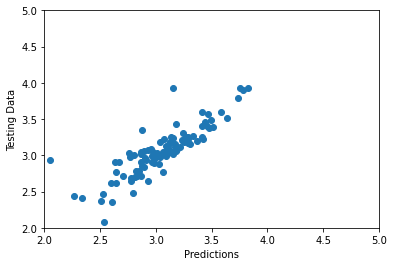

In [23]:
Y_pred=alg.predict(X_test)
plt.scatter(Y_pred,Y_test)
plt.xlabel("Predictions")
plt.ylabel("Testing Data")
plt.axis([2,5,2,5])
plt.show()

In [24]:
Y_pred[0],Y_test[0]


(3.3668949799969603, 3.2188758248682006)

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred) 
rmse = np.sqrt(mse)
mse,rmse

(0.035328372495372976, 0.18795843289241634)

Hence, it can be observed that the root mean square error and the mean squared error are reduced considerably and the model performs quite well on the given data.